 <div class="row">
  <div class="column">
    <img src="https://i.ibb.co/594JFYs/nyu-logo.png" align="left" style="height: 40px;"/>
  </div>
  <div class="column">
    <img src="https://i.ibb.co/pjyDY2n/vida-logo.png" align="right" style="width: 300px; height: 40px;"/>
  </div>
</div> 

In [5]:
from alphad3m import AutoML

## Analyzing the dataset

In [2]:
train_dataset_path = '/Users/rlopez/D3M/examples/JIDO_SOHR_Articles_1061/TRAIN'
test_dataset_path = '/Users/rlopez/D3M/examples/JIDO_SOHR_Articles_1061/TEST'
score_dataset_path = '/Users/rlopez/D3M/examples/JIDO_SOHR_Articles_1061/SCORE'
output_path = '/Users/rlopez/D3M/examples/tmp/'

In [ ]:
automl = AutoML(output_path, 'AlphaD3M')
automl.plot_summary_dataset(train_dataset_path, 'article')

## Generating pipelines using AlphaD3M

In [4]:
automl.search_pipelines(train_dataset_path, time_bound=60)

INFO: Initializing AlphaD3M AutoML...
INFO: AlphaD3M AutoML initialized!
INFO: Found pipeline id=9177ebc1-c797-44c5-85c4-435d119b72fb, time=0:01:01.668826, scoring...
INFO: Scored pipeline id=9177ebc1-c797-44c5-85c4-435d119b72fb, f1=0.30986
INFO: Found pipeline id=6f204ef3-a7ab-419b-8818-f3383826b1c8, time=0:01:55.957130, scoring...
INFO: Found pipeline id=c916bae4-63c4-44a2-ad70-7c7261ccac16, time=0:02:26.532382, scoring...
INFO: Scored pipeline id=6f204ef3-a7ab-419b-8818-f3383826b1c8, f1=0.7234
INFO: Scored pipeline id=c916bae4-63c4-44a2-ad70-7c7261ccac16, f1=0.1194
INFO: Found pipeline id=2589f20b-cf4c-49dd-856a-36045331c940, time=0:03:14.856457, scoring...
INFO: Scored pipeline id=2589f20b-cf4c-49dd-856a-36045331c940, f1=0.03448
INFO: Found pipeline id=f82b4cd1-1908-48d6-91a0-b514f77118b1, time=0:08:03.438780, scoring...
INFO: Scored pipeline id=f82b4cd1-1908-48d6-91a0-b514f77118b1, f1=0.09836
INFO: Found pipeline id=1f316c13-a49d-4b95-8037-5147b9e09219, time=0:09:06.825663, scorin

##  Visualizing the produced pipelines

In [ ]:
#pipelines_full_dataset = automl.create_pipelineprofiler_inputs(score_dataset_path)
automl = AutoML(output_path)
automl.plot_comparison_pipelines(precomputed_pipelines=pipelines_full_dataset)

## Sampling the training dataset

In [6]:
import pandas as pd
from d3m_interface.data_converter import d3mtext_to_dataframe
from text_sampling import progressive_sample
from utils import select_indices, dataframe_to_d3mtext, copy_dataset
# You need to copy text_sampling.py, active_learning.py and utils.py to run this example

initial_size = 100
train_dataset = d3mtext_to_dataframe(train_dataset_path, 'article')
test_dataset = d3mtext_to_dataframe(score_dataset_path, 'article')
labeled_indices, pool_indices = select_indices(train_dataset['articleofinterest'].to_list(), initial_size)
initial_dataset = train_dataset.iloc[labeled_indices]
pool_dataset = train_dataset.iloc[pool_indices]

F1 score (dataset size=100): 0.6438
F1 score (dataset size=200): 0.7171
F1 score (dataset size=400): 0.7214
F1 score (dataset size=800): 0.8303
F1 score (dataset size=1600): 0.7903
F1 score (dataset size=3200): 0.9039
Threshold reached!


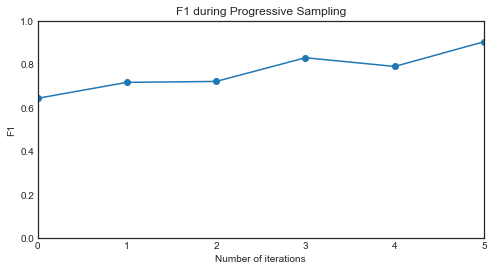

In [7]:
reduced_dataset = progressive_sample(initial_dataset, pool_dataset, test_dataset)

In [8]:
tmp_path = '/Users/rlopez/D3M/examples/tmp/'
reduced_dataset_path = dataframe_to_d3mtext(reduced_dataset, train_dataset_path, tmp_path, 'article')
test_dataset_path = copy_dataset(test_dataset_path, tmp_path)
score_dataset_path = copy_dataset(score_dataset_path, tmp_path)

## Reruning AlphaD3M

In [9]:
automl_red = AutoML(output_path, 'AlphaD3M')
automl_red.search_pipelines(reduced_dataset_path, time_bound=60)

INFO: Initializing AlphaD3M AutoML...
INFO: AlphaD3M AutoML initialized!
INFO: Found pipeline id=0f86c7f9-7597-4dcb-8876-1a0e720d5d1e, time=0:00:19.540164, scoring...
INFO: Scored pipeline id=0f86c7f9-7597-4dcb-8876-1a0e720d5d1e, f1=0.0
INFO: Found pipeline id=6bd3d8c8-28a0-4fc4-bf1c-81db71613e02, time=0:00:31.963719, scoring...
INFO: Scored pipeline id=6bd3d8c8-28a0-4fc4-bf1c-81db71613e02, f1=0.0
INFO: Found pipeline id=e4330b7e-e67d-4bbf-91c0-e74a68fcf11d, time=0:00:44.462464, scoring...
INFO: Scored pipeline id=e4330b7e-e67d-4bbf-91c0-e74a68fcf11d, f1=0.0
INFO: Found pipeline id=29c11056-beee-4932-9039-cb86b128e4bd, time=0:00:56.751769, scoring...
INFO: Scored pipeline id=29c11056-beee-4932-9039-cb86b128e4bd, f1=0.0
INFO: Found pipeline id=953d0167-562a-4a13-aa9c-806063397fcd, time=0:01:12.096589, scoring...
INFO: Scored pipeline id=953d0167-562a-4a13-aa9c-806063397fcd, f1=0.0
INFO: Found pipeline id=b5aac228-1e15-46e1-aca4-b0141c02b538, time=0:02:06.466271, scoring...
INFO: Scored 

In [ ]:
pipelines_reduced_dataset = automl_red.create_pipelineprofiler_inputs(score_dataset_path, source_name='AlphaD3M_R')
automl_red.plot_comparison_pipelines(precomputed_pipelines=pipelines_reduced_dataset)

## Comparing full and reduced datasets

In [ ]:
automl_red.plot_comparison_pipelines(precomputed_pipelines=pipelines_full_dataset+pipelines_reduced_dataset)

## Explaining the predictions

In [12]:
model_id = automl_red.train('ea68148e-9dce-48d2-b3c8-625d0149aef8')
predictions = automl_red.test(model_id, test_dataset_path)

INFO: Training model...
INFO: Training finished!
INFO: Testing model...
INFO: Testing finished!


In [13]:
predictions_df = predictions.rename(columns={'articleofinterest':'prediction'})
merged_df = pd.concat([test_dataset, predictions_df], axis=1)
true_positive = merged_df[(merged_df['articleofinterest'] == 1) & (merged_df['prediction'] == 1)]
false_positive = merged_df[(merged_df['articleofinterest'] == 0) & (merged_df['prediction'] == 1)]
false_negative = merged_df[(merged_df['articleofinterest'] == 1) & (merged_df['prediction'] == 0)]

### True Positive Documents

In [ ]:
true_positive_ids = [0, 1]
for i in true_positive_ids:
    instance_text = true_positive.iloc[i]['article']
    automl_red.plot_text_explanation(model_id, instance_text, 'article', 'articleofinterest')

### False Positive Documents

In [ ]:
false_positive_ids = [3, 177]
for i in false_positive_ids:
    instance_text = false_positive.iloc[i]['article']
    automl_red.plot_text_explanation(model_id, instance_text, 'article', 'articleofinterest')

#### Actionable insight

Featurization might be able identify the context in which words such as "barrel" and "bomb", improving the classification results.

Data Scientist could add embeddings such as word2vec and GloVe to the models produced by AlphaD3M.

### Mislabeled Documents

In [ ]:
mislabeled_ids = [19, 2]
for i in mislabeled_ids:
    print('Document Label: 0')
    print('Predicted Label: 1')
    instance_text = false_positive.iloc[i]['article']
    automl_red.plot_text_explanation(model_id, instance_text, 'article', 'articleofinterest')

In [17]:
print('Total Number of False Positive documents: {}'.format(len(false_positive)))

Total Number of False Positive documents: 178


## Document exploration with VisualTextAnalyzer

In [ ]:
processed_data = automl_red.create_textanalizer_inputs(train_dataset_path, 'article', 'articleofinterest')
automl_red.plot_text_analysis(precomputed_data=processed_data)

In [1]:
# Load previous runs
import json

def filter_pipelines(pipelines):
    return [i for i in pipelines if i['scores'][0]['value'] > 0]

with open('/Users/rlopez/D3M/examples/pipelines_explosion_full_dataset.json') as fin:
    pipelines_full_dataset = json.load(fin)
    pipelines_full_dataset = filter_pipelines(pipelines_full_dataset)

with open('/Users/rlopez/D3M/examples/pipelines_explosion_reduced_dataset.json') as fin:
    pipelines_reduced_dataset = json.load(fin)
    pipelines_reduced_dataset = filter_pipelines(pipelines_reduced_dataset)

with open('/Users/rlopez/D3M/examples/explosion_vta.json', 'r') as f:
    processed_data = json.load(f)

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:1600px !important; }</style>"))